In [5]:
import pandas as pd
import math
import statsmodels.api as sm
from scipy.stats import pearsonr
import numpy as np

In [18]:
def get_corr(df2):
    #print(df2.info())
    c=df2.corr()
    c[:] = np.where(c.eq('NaN'), 0, c)
    #c = c.replace('NaN', 0)
    #print(c)
    return c
def get_data(country):
    url = 'alldata_backup/'+country+'.csv'
    dateparse = lambda dates: [pd.datetime.strptime(d, '%d-%m-%Y') for d in dates]
    df = pd.read_csv(url,parse_dates = True,date_parser=dateparse,index_col=1)
    #df['date'] = pd.to_datetime(df.date, format='%d/%m/%Y')
    master_col='active_case'
    active_case=df['confirmed']-df['deaths']-df['recovered'] #caluculate active case
    df2=df[['humidity_mean','humidity_std','dew_mean','dew_std',
            'mean_ozone','std_ozone','mean_precip','std_precip','mean_tMax','std_tMax','mean_tMin','std_tMin','mean_uv','std_uv']].copy()
    df2['active_case']=active_case #add active case
    c=get_corr(df2)
    
    return c


In [33]:
import os
import csv


    

arr = os.listdir('alldata_backup/')
count_all = pd.read_csv('result.csv')
final_cor=np.zeros((15,15))
f=[]
for c in(arr):
    country=c[:-4]
    c=get_data(country)
    npc=np.array(c)
    where_are_NaNs = np.isnan(npc)
    npc[where_are_NaNs] = 0
    f.append(npc[0])

data=np.array(f)
np.savetxt("cor1.csv", data, delimiter=",")

C:\Users\ase072\AppData\Local\Continuum\anaconda3\envs\ratnabali2\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  # Remove the CWD from sys.path while we load stuff.


In [34]:
# import the required library  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline 
  
  
# load the dataset 
df = pd.read_csv("cor1.csv") 

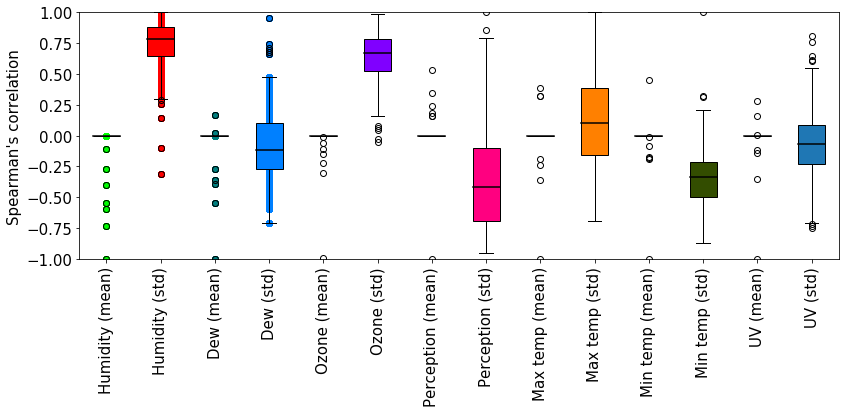

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
#labels=['ED+Kmeans','DTW+kmeans','MS','MBMS','AMKS+kmeans','Fast+kmeans','DETECT','Deep','Proposed']
# rectangular box plot
colors = [[0,1,0], [1,0,0], [0,0.5,0.5], [0,0.5,1], [0,0,1], [0.5,0,1], [1,0,1], [1,0,0.5], [1,0,0]
         , [1,0.5,0], [1,0,0.2], [0.2,0.3,0], [0.4,0,1]]
df1=df['2']
df2=df['3']
df3=df['4']
df4=df['5']
df5=df['6']
df6=df['7']
df7=df['8']
df8=df['9']
df9=df['10']
df10=df['11']
df11=df['12']
df12=df['13']
df13=df['14']
df14=df['15']
data=[df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14]
medianprops = dict(color="black",linewidth=1.5)
l=['Humidity (mean)', 'Humidity (std)', 'Dew (mean)', 'Dew (std)', 'Ozone (mean)',
       'Ozone (std)', 'Perception (mean)', 'Perception (std)', 'Max temp (mean)', 'Max temp (std)',
       'Min temp (mean)', 'Min temp (std)', 'UV (mean)', 'UV (std)']
bp=axes.boxplot(data,patch_artist=True,medianprops=medianprops,labels=l)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

cclass=np.zeros(169)
cclass+=1
index=1
for i in range(len(df1)):
    plt.scatter(cclass,df1, color=colors[index-1], alpha=0.2)

cclass+=1
index=2
for i in range(len(df2)):
    plt.scatter(cclass,df2, color=colors[index-1], alpha=0.2)

cclass+=1
index=3
for i in range(len(df3)):
    plt.scatter(cclass,df3, color=colors[index-1], alpha=0.2)

cclass+=1
index=4
for i in range(len(df4)):
    plt.scatter(cclass,df4, color=colors[index-1], alpha=0.2)
    
axes.set_ylabel("Spearman's correlation")
#axes.set_xlabel("Number of days ahed")
axes.set_ylim([-1,1])
plt.rcParams.update({'font.size': 15})
plt.xticks(rotation=90)

fig1 = plt.gcf()
plt.draw()
plt.show()
fig1.savefig('cor1.png',dpi=200)

In [ ]:
height = [3, 12, 5, 18, 45]
bars = ('A', 'B', 'C', 'D', 'E')
x=np.array(count_all.head(1)).ravel()
print(len(x))